# Aviation Accident Database & Synopses, up to 2023

## About [Dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)

### Content

The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

### Acknowledgements

Generally, a preliminary report is available online within a few days of an accident. Factual information is added when available, and when the investigation is completed, the preliminary report is replaced with a final description of the accident and its probable cause. Full narrative descriptions may not be available for dates before 1993, cases under revision, or where NTSB did not have primary investigative responsibility.

### Inspiration

Hope it will teach us how to improve the quality and safety of traveling by Airplane.

> **Note:** We are using the [CRISP DM](https://www.datascience-pm.com/crisp-dm-2/) methodology to help use meet our requirements

## Understanding the data

### Loading the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('./data/AviationData.xlsx')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09 00:00:00
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


> **Note**: This dataset is quite large so load just once. Had to load an excel file because csv results to an error

In [3]:
df.shape

(88889, 31)

In [4]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
df.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88889,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1999-09-17 17:13:39.354475904,1.146585,0.647855,0.279881,0.357061,5.325440
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989-01-15 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1998-07-18 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2009-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000
std,NaN,0.446510,5.485960,1.544084,2.235625,27.913634


Isolate just the **interesting columns** that seem relevant to my research and contribute to business understanding [here](https://github.com/learn-co-curriculum/dsc-phase-1-project-v3)

In [6]:
interesting_columns = [
    'Injury.Severity',
    'Aircraft.damage',
    'Aircraft.Category',
    'Make',
    'Model',
    'Number.of.Engines',
    'Engine.Type',
    'Weather.Condition',
    'Broad.phase.of.flight',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured'
]

These _**variables**_ will help me analyze and compare the safety records, damage extent, and injury outcomes of different aircraft models and manufacturers, ultimately leading to informed recommendations for aircraft purchase decisions.

In [7]:
df2 = df[interesting_columns].copy()  # it's crutial you use copy to avoid `SettingWithCopyWarning`
df2.head()

,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,UNK,Cruise,2.0,0.0,0.0,0.0
1,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,UNK,Unknown,4.0,0.0,0.0,0.0
2,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,IMC,Cruise,3.0,NaN,NaN,NaN
3,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,IMC,Cruise,2.0,0.0,0.0,0.0
4,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,VMC,Approach,1.0,2.0,NaN,0.0


In [8]:
df2.shape

(88889, 13)

## Data Cleaning

### Handling missing values

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         87889 non-null  object 
 1   Aircraft.damage         85695 non-null  object 
 2   Aircraft.Category       32287 non-null  object 
 3   Make                    88826 non-null  object 
 4   Model                   88797 non-null  object 
 5   Number.of.Engines       82805 non-null  float64
 6   Engine.Type             81793 non-null  object 
 7   Weather.Condition       84397 non-null  object 
 8   Broad.phase.of.flight   61724 non-null  object 
 9   Total.Fatal.Injuries    77488 non-null  float64
 10  Total.Serious.Injuries  76379 non-null  float64
 11  Total.Minor.Injuries    76956 non-null  float64
 12  Total.Uninjured         82977 non-null  float64
dtypes: float64(5), object(8)
memory usage: 8.8+ MB


In [10]:
missing_values_series = df2.isna().sum()
missing_values_series

Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Number.of.Engines          6084
Engine.Type                7096
Weather.Condition          4492
Broad.phase.of.flight     27165
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
dtype: int64

**Create a dataframe to show percentage missing values for each column so we can know how to deal with them**

In [11]:
missing_values_indexes = list(missing_values_series.index)
missing_values_values = list(missing_values_series.values)

In [12]:
missing_values_percentage = pd.DataFrame({"indexes": missing_values_indexes, "values": missing_values_values, "percentage_missing": list(np.round(((np.array(missing_values_values) * 100) / len(df2)), 2))})
missing_values_percentage.set_index("indexes", inplace=True)
missing_values_percentage

,values,percentage_missing
indexes,,
Injury.Severity,1000,1.12
Aircraft.damage,3194,3.59
Aircraft.Category,56602,63.68
Make,63,0.07
Model,92,0.10
Number.of.Engines,6084,6.84
Engine.Type,7096,7.98
Weather.Condition,4492,5.05
Broad.phase.of.flight,27165,30.56


Some columns have increasing alot of missing values and therefore they need to be **dropped** entirely based on their relevance in this research

In [13]:
# Imputing missing values
df2['Injury.Severity'].fillna(df2['Injury.Severity'].mode()[0], inplace=True)
df2['Aircraft.damage'].fillna(df2['Aircraft.damage'].mode()[0], inplace=True)
df2['Aircraft.Category'].fillna('Unknown', inplace=True)
df2['Make'].fillna(df2['Make'].mode()[0], inplace=True)
df2['Model'].fillna(df2['Model'].mode()[0], inplace=True)
df2['Number.of.Engines'].fillna(df2['Number.of.Engines'].mode()[0], inplace=True)
df2['Engine.Type'].fillna(df2['Engine.Type'].mode()[0], inplace=True)
df2['Weather.Condition'].fillna(df2['Weather.Condition'].mode()[0], inplace=True)
df2['Broad.phase.of.flight'].fillna('Unknown', inplace=True)
df2['Total.Fatal.Injuries'].fillna(0, inplace=True)
df2['Total.Serious.Injuries'].fillna(0, inplace=True)
df2['Total.Minor.Injuries'].fillna(0, inplace=True)
df2['Total.Uninjured'].fillna(df2['Total.Uninjured'].mode()[0], inplace=True)
df2.isna().sum()

Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Weather.Condition         0
Broad.phase.of.flight     0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

In [46]:
df2['Weather.Condition'].loc[(df2['Weather.Condition'] == 'Unk')] = 'UNK'
df2['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC'], dtype=object)

In [48]:
df2['Engine.Type'].loc[(df2['Engine.Type'] == 'UNK')] = 'Unknown'
df2['Engine.Type'].unique()

array(['Unknown', 'Reciprocating', 'Turbo Fan', 'Turbo Shaft',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE'], dtype=object)

In [57]:
df2['Aircraft.Category'].loc[(df2['Aircraft.Category'] == 'UNK')] = 'Unknown'
df2['Aircraft.Category'].unique()

array(['Unknown', 'Airplane', 'Helicopter', 'Glider', 'Balloon',
       'Gyrocraft', 'Ultralight', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'ULTR'], dtype=object)

### Handle Duplicates

In [58]:
# Check for duplicates in the dataframe
duplicates = df2.duplicated()

# Display the number of duplicate rows
num_duplicates = duplicates.sum()
print(f'Number of duplicate rows: {num_duplicates}')

# Display the duplicate rows, if any
if num_duplicates > 0:
    duplicate_rows = df2[duplicates]
    print(duplicate_rows)
else:
    print('No duplicate rows found.')

Number of duplicate rows: 27203
      Injury.Severity Aircraft.damage Aircraft.Category  \
59          Non-Fatal     Substantial          Airplane   
121         Non-Fatal     Substantial          Airplane   
136         Non-Fatal     Substantial          Airplane   
175         Non-Fatal     Substantial          Airplane   
180         Non-Fatal     Substantial          Airplane   
...               ...             ...               ...   
88873       Non-Fatal     Substantial          Airplane   
88874       Non-Fatal     Substantial           Unknown   
88877           Minor     Substantial          Airplane   
88883           Fatal     Substantial           Unknown   
88886       Non-Fatal     Substantial          Airplane   

                             Make   Model  Number.of.Engines    Engine.Type  \
59                         Cessna     152                1.0  Reciprocating   
121                        Cessna     152                1.0  Reciprocating   
136                   

In [59]:
# Remove duplicates from the dataframe
df2_cleaned = df2.drop_duplicates()

# Verify that duplicates have been removed
print(f'Number of rows after removing duplicates: {df2_cleaned.shape[0]}')

Number of rows after removing duplicates: 61686


In [60]:
df2_cleaned.head()

,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Fatal(2),Destroyed,Unknown,Stinson,108-3,1.0,Unknown,UNK,Cruise,2.0,0.0,0.0,0.0
1,Fatal(4),Destroyed,Unknown,Piper,PA24-180,1.0,Unknown,UNK,Unknown,4.0,0.0,0.0,0.0
2,Fatal(3),Destroyed,Unknown,Cessna,172M,1.0,Reciprocating,IMC,Cruise,3.0,0.0,0.0,0.0
3,Fatal(2),Destroyed,Unknown,Rockwell,112,1.0,Reciprocating,IMC,Cruise,2.0,0.0,0.0,0.0
4,Fatal(1),Destroyed,Unknown,Cessna,501,1.0,Reciprocating,VMC,Approach,1.0,2.0,0.0,0.0


### Type Conversion

In [61]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61686 entries, 0 to 88888
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         61686 non-null  object 
 1   Aircraft.damage         61686 non-null  object 
 2   Aircraft.Category       61686 non-null  object 
 3   Make                    61686 non-null  object 
 4   Model                   61686 non-null  object 
 5   Number.of.Engines       61686 non-null  float64
 6   Engine.Type             61686 non-null  object 
 7   Weather.Condition       61686 non-null  object 
 8   Broad.phase.of.flight   61686 non-null  object 
 9   Total.Fatal.Injuries    61686 non-null  float64
 10  Total.Serious.Injuries  61686 non-null  float64
 11  Total.Minor.Injuries    61686 non-null  float64
 12  Total.Uninjured         61686 non-null  float64
dtypes: float64(5), object(8)
memory usage: 6.6+ MB


In [62]:
df2_cleaned['Number.of.Engines'] = df2_cleaned['Number.of.Engines'].map(int)
df2_cleaned.loc[:, ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']] = df2_cleaned[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].astype(int)
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61686 entries, 0 to 88888
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         61686 non-null  object 
 1   Aircraft.damage         61686 non-null  object 
 2   Aircraft.Category       61686 non-null  object 
 3   Make                    61686 non-null  object 
 4   Model                   61686 non-null  object 
 5   Number.of.Engines       61686 non-null  int64  
 6   Engine.Type             61686 non-null  object 
 7   Weather.Condition       61686 non-null  object 
 8   Broad.phase.of.flight   61686 non-null  object 
 9   Total.Fatal.Injuries    61686 non-null  float64
 10  Total.Serious.Injuries  61686 non-null  float64
 11  Total.Minor.Injuries    61686 non-null  float64
 12  Total.Uninjured         61686 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 6.6+ MB


/tmp/ipykernel_75697/177581856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned['Number.of.Engines'] = df2_cleaned['Number.of.Engines'].map(int)


### Export Data

In [63]:
df2_cleaned.to_csv('./data/AviationDataCleaned.csv', index=False)

## Data Analysis

In [20]:
# Descriptive statistics for numerical variables
df2_cleaned[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,61686.000000,61686.000000,61686.000000,61686.000000
mean,0.748079,0.316701,0.397951,6.574231
std,6.129929,1.704701,2.482730,32.178140
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000


### Visualizations

#### Bar chart for Injury Severity

/tmp/ipykernel_75697/1056378067.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=severity_counts.index, x=severity_counts.values, palette='viridis')


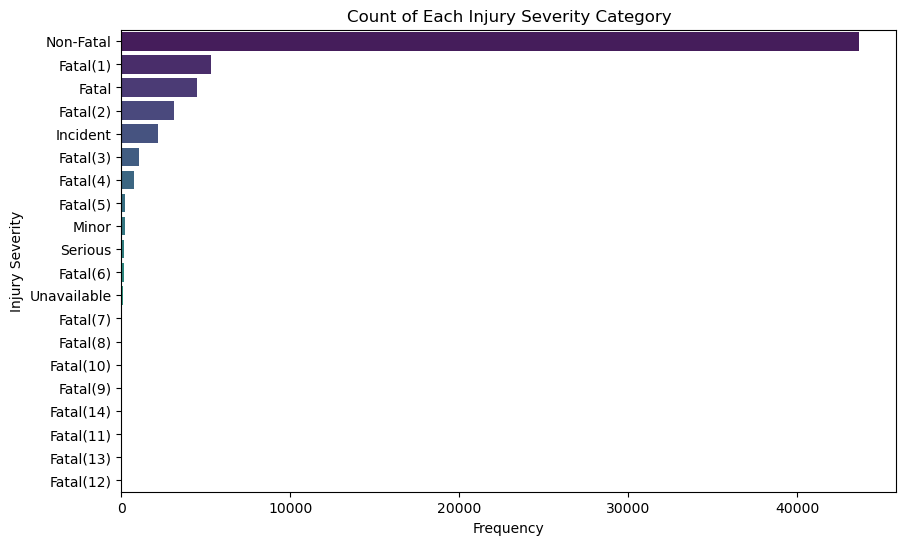

In [21]:
# Counting frequencies of each severity category
severity_counts = df2_cleaned['Injury.Severity'].value_counts()[:20]

# Filtering out categories with zero counts
severity_counts = severity_counts[severity_counts > 1]

# Bar chart for Injury Severity
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=severity_counts.index, x=severity_counts.values, palette='viridis')
ax.set_title('Count of Each Injury Severity Category')
ax.set_xlabel('Frequency')
ax.set_ylabel('Injury Severity')
plt.show()

#### Bar chart for Aircraft Damage

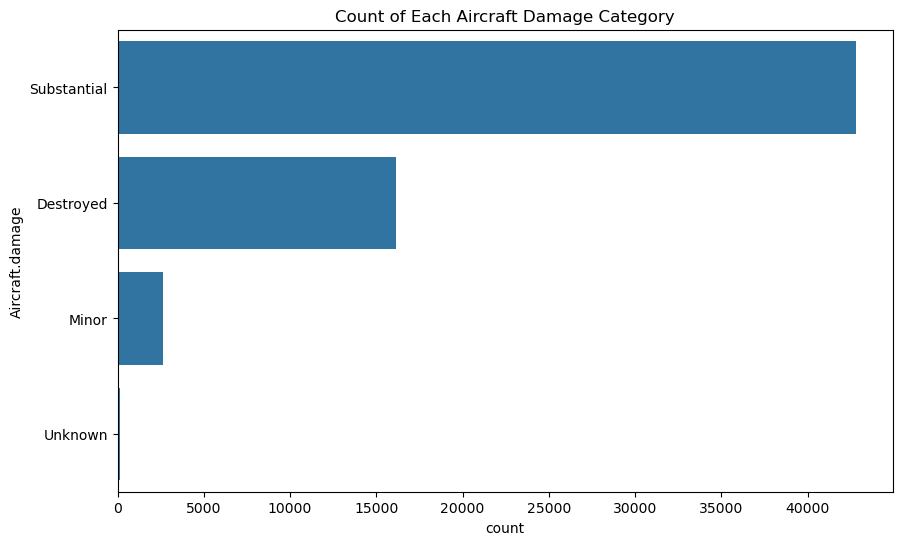

In [22]:
# Bar chart for Aircraft Damage
plt.figure(figsize=(10, 6))
sns.countplot(y='Aircraft.damage', data=df2_cleaned, order=df2_cleaned['Aircraft.damage'].value_counts().index)
plt.title('Count of Each Aircraft Damage Category')
plt.show()

#### Bar chart for Broad Phase of Flight

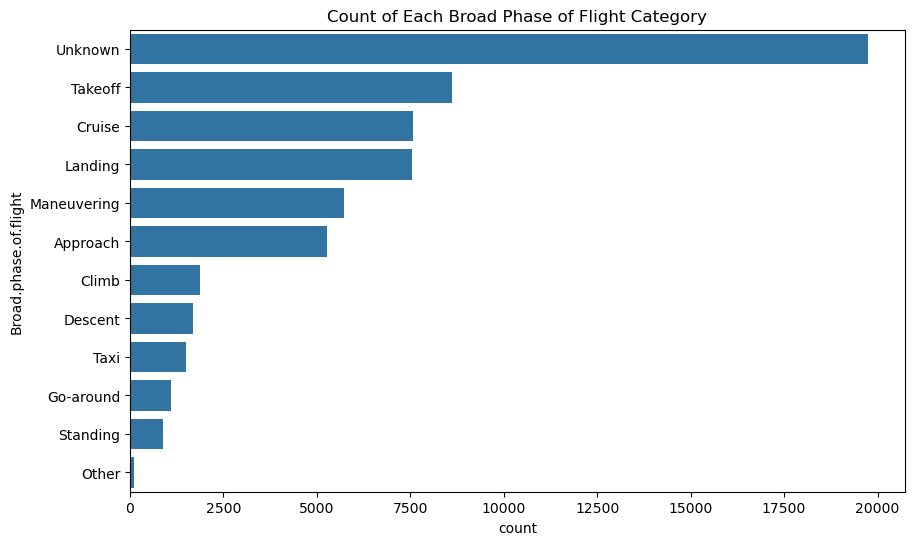

In [23]:
# Bar chart for Broad Phase of Flight
plt.figure(figsize=(10, 6))
sns.countplot(y='Broad.phase.of.flight', data=df2_cleaned, order=df2_cleaned['Broad.phase.of.flight'].value_counts().index)
plt.title('Count of Each Broad Phase of Flight Category')
plt.show()

#### Bar chart for Weather Condition

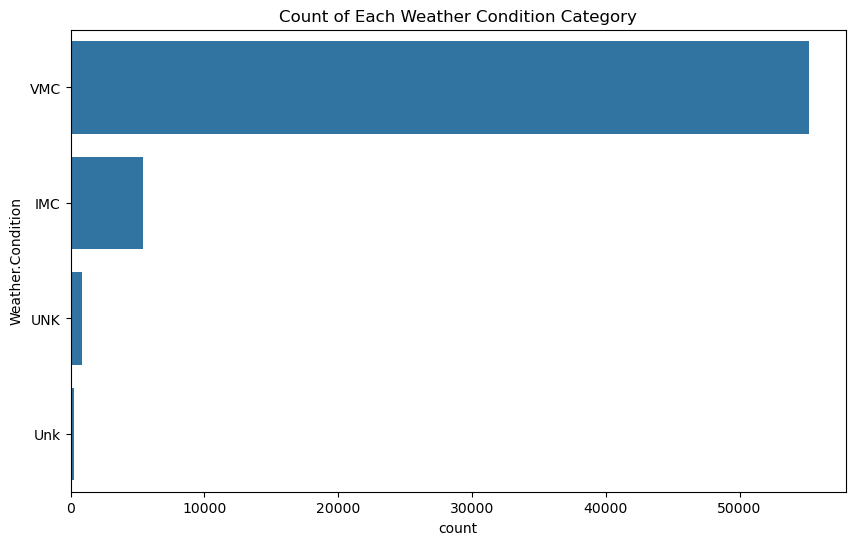

In [24]:
# Bar chart for Weather Condition
plt.figure(figsize=(10, 6))
sns.countplot(y='Weather.Condition', data=df2_cleaned, order=df2_cleaned['Weather.Condition'].value_counts().index)
plt.title('Count of Each Weather Condition Category')
plt.show()

#### Correlation heatmap for numerical variables

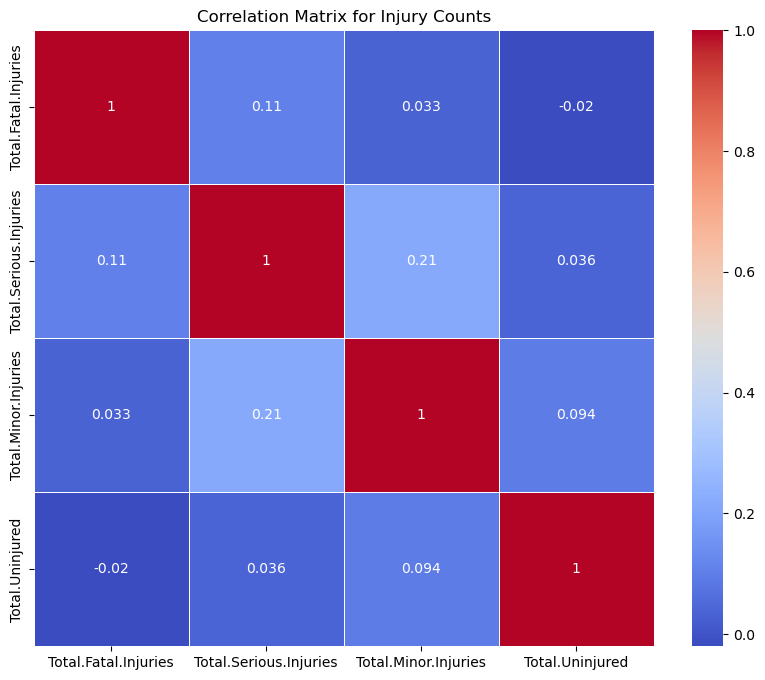

In [25]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df2_cleaned[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Injury Counts')
plt.show()

## Interpretation and Recommendations